In [326]:
import pandas as pd
from pathlib import Path

test = "0"
scene = "empty"
camera = "camera1"
csv_path = Path(f"Output/{scene}/opacity/{test}/{camera}_opacity_sweep.csv")

if not csv_path.exists():
    raise FileNotFoundError(f"CSV file not found: {csv_path}")

df = pd.read_csv(csv_path)

required_columns = {"opacity", "loss", "analytic_grad", "fd_grad"}
if not required_columns.issubset(df.columns):
    raise RuntimeError(f"CSV must contain columns: {required_columns}")

df.head()

,iter,opacity,loss,analytic_grad,fd_grad,fd_kind,fd_epsilon
0,0,0.0,0.008174,-0.016083,-0.016203,1,0.001
1,1,0.1,0.006635,-0.014498,-0.013907,0,0.001
2,2,0.2,0.005252,-0.012874,-0.012696,0,0.001
3,3,0.3,0.004033,-0.011269,-0.016748,0,0.001
4,4,0.4,0.002976,-0.009653,-0.008169,0,0.001


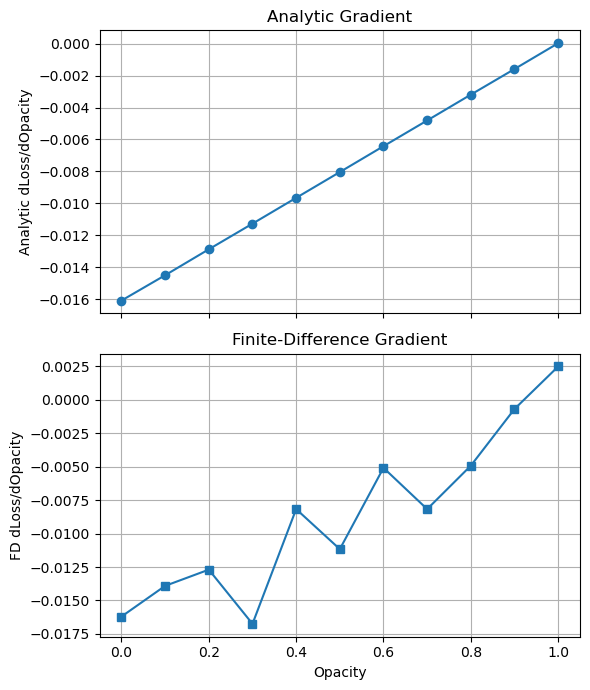

PosixPath('Output/empty/opacity/0/camera1_opacity_sweep_grad_subplots.png')

In [327]:
import matplotlib.pyplot as plt

NUMERICAL_COLUMN = "fd_grad"

required_columns = {"opacity", "analytic_grad", NUMERICAL_COLUMN}
if not required_columns.issubset(df.columns):
    raise RuntimeError(f"CSV must contain columns: {required_columns}")

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 7), sharex=True)

# --- Top: Analytic ---
axes[0].plot(df["opacity"], df["analytic_grad"], marker="o")
axes[0].set_ylabel("Analytic dLoss/dOpacity")
axes[0].set_title("Analytic Gradient")
axes[0].grid(True)

# --- Bottom: Finite Difference ---
axes[1].plot(df["opacity"], df[NUMERICAL_COLUMN], marker="s")
axes[1].set_xlabel("Opacity")
axes[1].set_ylabel("FD dLoss/dOpacity")
axes[1].set_title("Finite-Difference Gradient")
axes[1].grid(True)

output_png = csv_path.with_name(csv_path.stem + "_grad_subplots.png")
plt.tight_layout()
plt.savefig(output_png, dpi=200, bbox_inches="tight")
plt.show()

output_png

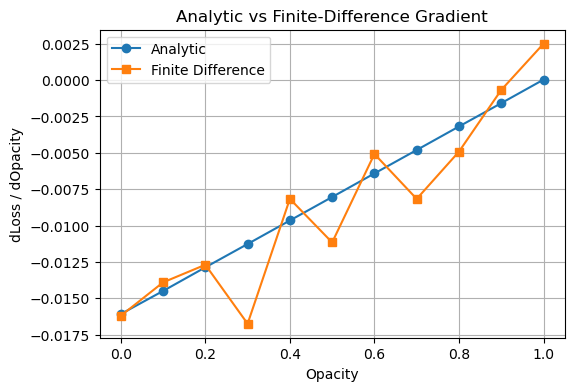

PosixPath('Output/empty/opacity/0/camera1_opacity_sweep_grad_compare.png')

In [328]:
NUMERICAL_COLUMN = "fd_grad"

required_columns = {"opacity", "analytic_grad", NUMERICAL_COLUMN}
if not required_columns.issubset(df.columns):
    raise RuntimeError(f"CSV must contain columns: {required_columns}")

plt.figure(figsize=(6, 4))

plt.plot(df["opacity"], df["analytic_grad"], marker="o", label="Analytic")
plt.plot(df["opacity"], df[NUMERICAL_COLUMN], marker="s", label="Finite Difference")

plt.xlabel("Opacity")
plt.ylabel("dLoss / dOpacity")
plt.title("Analytic vs Finite-Difference Gradient")
plt.grid(True)
plt.legend()

output_png = csv_path.with_name(csv_path.stem + "_grad_compare.png")
plt.savefig(output_png, dpi=200, bbox_inches="tight")
plt.show()

output_png

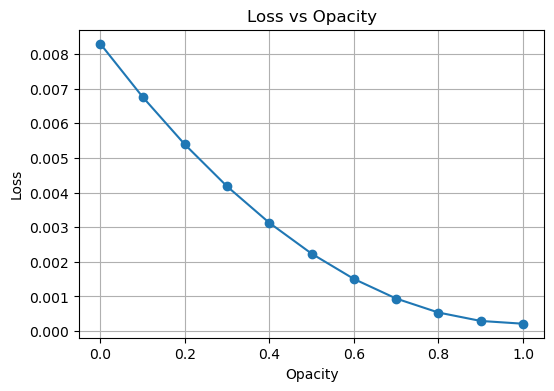

PosixPath('Output/empty/opacity/23/camera1_opacity_sweep_loss.png')

In [316]:
plt.figure(figsize=(6, 4))
plt.plot(df["opacity"], df["loss"], marker="o")
plt.xlabel("Opacity")
plt.ylabel("Loss")
plt.title("Loss vs Opacity")
plt.grid(True)

output_png = csv_path.with_name(csv_path.stem + "_loss.png")
plt.savefig(output_png, dpi=200, bbox_inches="tight")
plt.show()

output_png

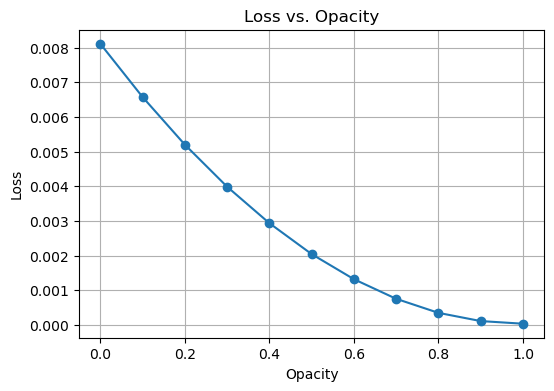

In [276]:
plt.figure(figsize=(6, 4))
plt.plot(df["opacity"], df["loss"], marker="o")
plt.xlabel("Opacity")
plt.ylabel("Loss")
plt.title("Loss vs. Opacity")
plt.grid(True)

# Also save next to the CSV
output_png = csv_path.with_suffix(".png")
#plt.savefig(output_png, dpi=200, bbox_inches="tight")

#output_png


In [277]:
print(df[NUMERICAL_COLUMN])


0    -0.015376
1    -0.013753
2    -0.012142
3    -0.010522
4    -0.008930
5    -0.007239
6    -0.005661
7    -0.004056
8    -0.002369
9    -0.000764
10   -0.000764
Name: numerical_opacity_grad_forward, dtype: float64


## BETA PARAMETER

In [198]:
test = "12"
csv_path = Path(f"Output/empty/beta/{test}/camera1_beta_sweep.csv")

if not csv_path.exists():
    raise FileNotFoundError(f"CSV file not found: {csv_path}")

df = pd.read_csv(csv_path)

required_columns = {"beta", "loss"}
if not required_columns.issubset(df.columns):
    print(df.columns)
    raise RuntimeError(f"CSV must contain columns: {required_columns}")

df.head()


,iter,beta,loss,analytic_grad
0,0,6.0,0.004800,0.000002
1,1,5.7,0.004800,0.000002
2,2,5.4,0.004799,0.000003
3,3,5.1,0.004798,0.000004
4,4,4.8,0.004796,0.000006


In [199]:
import numpy as np

# ---- Edit this name if your CSV uses a different column ----
NUMERICAL_COLUMN = "numerical_beta_grad_forward"  # forward-difference gradient

required_columns = {"beta", "loss"}
if not required_columns.issubset(df.columns):
    raise RuntimeError(f"CSV must contain columns: {required_columns}")

beta = df["beta"].to_numpy(dtype=np.float64)
loss = df["loss"].to_numpy(dtype=np.float64)

# Forward difference: dLoss/dBeta at i uses (i+1 - i)
grad_fd = np.zeros_like(loss)
grad_fd[:-1] = (loss[1:] - loss[:-1]) / (beta[1:] - beta[:-1])

# Last point: fallback to backward difference (no i+1 available)
grad_fd[-1] = (loss[-1] - loss[-2]) / (beta[-1] - beta[-2])

df[NUMERICAL_COLUMN] = grad_fd

df[["iter", "beta", "loss", NUMERICAL_COLUMN]]


,iter,beta,loss,numerical_beta_grad_forward
0,0,6.0,0.004800,0.000002
1,1,5.7,0.004800,0.000003
2,2,5.4,0.004799,0.000003
3,3,5.1,0.004798,0.000005
4,4,4.8,0.004796,0.000007
5,5,4.5,0.004794,0.000009
6,6,4.2,0.004792,0.000012
7,7,3.9,0.004788,0.000017
8,8,3.6,0.004783,0.000023
9,9,3.3,0.004776,0.000031


PosixPath('Output/empty/beta/12/camera1_beta_sweep_grad_compare.png')

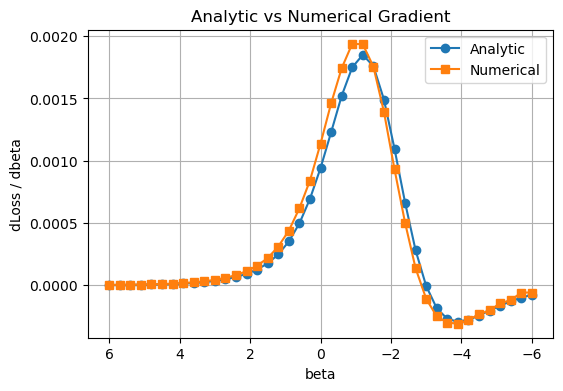

In [200]:
required_columns = {"iter", "analytic_grad", NUMERICAL_COLUMN}
if not required_columns.issubset(df.columns):
    raise RuntimeError(f"CSV must contain columns: {required_columns}")

plt.figure(figsize=(6, 4))

plt.plot(df["beta"], df["analytic_grad"], marker="o", label="Analytic")
plt.plot(df["beta"], df[NUMERICAL_COLUMN], marker="s", label="Numerical")

plt.xlabel("beta")
plt.ylabel("dLoss / dbeta")
plt.title("Analytic vs Numerical Gradient")
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()

output_png = csv_path.with_name(csv_path.stem + "_grad_compare.png")
plt.savefig(output_png, dpi=200, bbox_inches="tight")

output_png


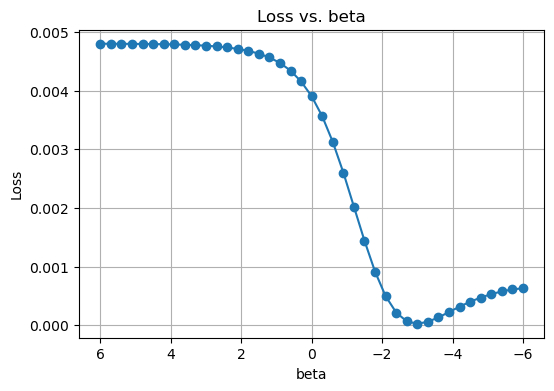

In [201]:
plt.figure(figsize=(6, 4))
plt.plot(df["beta"], df["loss"], marker="o")
plt.xlabel("beta")
plt.ylabel("Loss")
plt.title("Loss vs. beta")
plt.grid(True)
plt.gca().invert_xaxis()

# Also save next to the CSV
output_png = csv_path.with_suffix(".png")
plt.savefig(output_png, dpi=200, bbox_inches="tight")


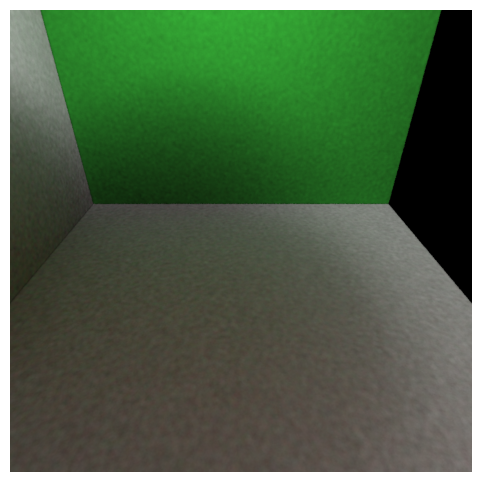

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Replace this with your own path
image_path = Path(f"Output/{type}/opacity/camera1_target.png")

# Load image
image = mpimg.imread(image_path)

# Show image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis("off")

# If the PNG is grayscale, matplotlib may apply a colormap.
# Force grayscale display if needed:
# plt.imshow(image, cmap="gray")

plt.show()


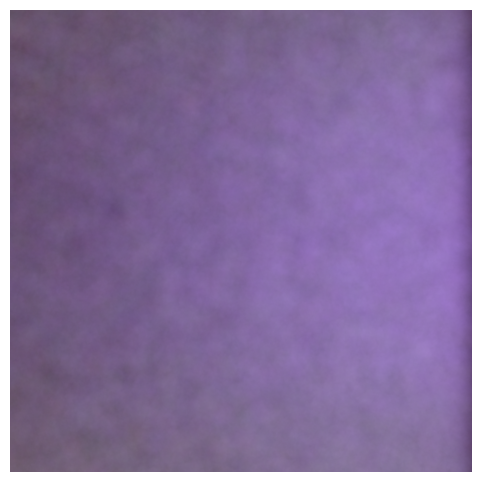

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Replace this with your own path
image_path = Path(f"Output/scatter/opacity/camera1_target.png")

# Load image
image = mpimg.imread(image_path)

# Show image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis("off")

# If the PNG is grayscale, matplotlib may apply a colormap.
# Force grayscale display if needed:
# plt.imshow(image, cmap="gray")

plt.show()
